 # Laboratorio 2.1: Clasificación

 Bárbara Poblete, Felipe Bravo, Aymé Arango, Juglar Díaz, Hernán Sarmiento, Juan Pablo Silva

 **Septiembre 2019**

 ## =================== INTEGRANTES =====================

 Escriba a continuación el nombre de los integrantes del presente laboratorio:

 1. Bastián Inostroza

 2. Sebastián Guerraty

 ## =====================================================

 # Instrucciones


 1. El formato de entrega es un documento en **.ipynb**, generado por jupyter.

 2. Asegúrese que están los nombres de los integrantes. Sólo uno de los integrantes debe subir este archivo a U-Cursos antes de finalizar la sesión.

 3. Las respuestas a cada pregunta se deben escribir en los bloques que dicen **RESPUESTA A PREGUNTA X.X**.

 # Del Laboratorio

 En este laboratorio, primero vamos a hacer un análisis de datos y luego vamos a entrenar un clasificador de 3 maneras:

 * Entrenar/testear con los mismos datos,

 * Dividiendo el dataset en una parte para entrenar y otra para testear, y finalmente,

 * Usando cross-validation. Veremos accuracy, precision y recall para luego analizar los resultados.


 # Parte 1: Evaluar un clasificador

 Usaremos el **Wine Dataset**, que viene en **scikit-learn**. Para ello, ejecutaremos la siguiente línea de código para cargar nuestro dataset.

In [1]:
from sklearn.datasets import load_wine



 ## PREGUNTA 1.1

 Indique lo siguiente:
 * Tamaño del dataset.
 * ¿Cuántas clases son?
 * ¿Qué nombre tienen las clases?
 * ¿Cuántas instancias hay de cada clase?

 Indique en cada caso cómo obtuvo la respuesta, es decir, adjunte código.

 ### RESPUESTA A PREGUNTA 1.1
## RESPUESTA A PREGUNTA 1.1

 ## Pregunta 1.2

 Explique qué hacen las siguientes líneas de código.

In [2]:
import matplotlib.pyplot as plt #carga pyplot desde matplotlib
import seaborn as sns; sns.set(style="ticks", color_codes=True) #carga seaborn
import pandas as pd #carga pandas

wine = load_wine() #carga los datos default de wine

features = pd.DataFrame(data=wine['data'],columns=wine['feature_names']) #crea el dataframe de los features en base a los datos de wine
data = features #asigna el df creado a la variable data
data['target']=wine['target'] # asgina la variable target dentro de data como los valores de la variable target dentro del df wine
data['class']=data['target'].map(lambda ind: wine['target_names'][ind]) # mapea el indicador de target_names de wine a la cariable class en el df data
                               

g = sns.pairplot(data.iloc[:, 0:5]) # Parametro kind="reg" agrega una recta, hace el plot de distribucion para las variables 0 a la 5 en el df data
plt.show() #muestra los plot creados con seaborn en la linea anterior


<Figure size 1250x1250 with 30 Axes>

 ## RESPUESTA A PREGUNTA 1.2
 - Las primeras 3 lineas cargan las librerias pyplot de matplotlib, seaborn y pandas respectivamente.
 - la linea de 'wine' carga el dataframe de 'wine' en la variable 'wine'
 - 'features' crea un dataframe en base a los 'features' del df 'wine' usando los df de pandas
 - 'data' crea un duplicado de 'features' en la variable 'data'
 - crea la columna 'target' dentro de data como la columna target dentro de wine
 - mapea el indicador de target_names de wine a la cariable class en el df data
 - crea los plot de distrubución de las variables 1 a la 6 usando seaborn
 - muestra los plot creados con seaborn

 ## Pregunta 1.3

 ¿Cuáles son las observaciones principales que puede obtener de la visualización? Explique.

 ### RESPUESTA A PREGUNTA 1.3
 - la variable alchool pareciese ser distribuida uniformemente salvo datos extremos en ambas colas
 - la variable de acido malico pareciese ser distribucion gama mientras las variables restantes tienen comportamiento que semeja una distribución normal
 - La disperción de los datos en las variabes de alcohol y ácido malico es mayor al de las variables de distribución normal
 - A simple vista no pareciese haber una fuerte correlación entre las variables ploteadas, donde se esperaría que la mayor sea una correlación positiva entre la acidez de la ceniza y la cantidad de ceniza en las variables 'acidity_of_ash' y 'ash' respectivamente.

 # PARTE 2: Entrenar/testear con los mismos datos

 Usaremos el clasificador **Decision Tree**, utilizando distintas formas de evaluación y vamos a compararlas mediante diversas métricas.

 ## PREGUNTA 2.1

 Usando el siguiente código, complete lo que falta para cargar los datos y entrenar el clasificador. Luego, muestre las métricas de accuracy, precision, recall y f1-score utilizando (X,y) como data y etiquetas respectivamente.

In [3]:
## RESPUESTA PREGUNTA 2.1

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
X = wine.data      ## datos, caracteristicas o features de cada flor. 
y = wine.target    ## clase para cada instancia anterior.

# Fit, predict y metricas

clf.fit(X,y)
y_pred = clf.predict(X)

from sklearn.metrics import classification_report

print(classification_report(y, y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



 ## Pregunta 2.2

 De acuerdo a las métricas obtenidas ¿Es buena la predicción? ¿Recomendaria utilizar este clasificador en una aplicacion para clasificar vinos?

 ### RESPUESTA A PREGUNTA 2.2
 La predicción es perfecta puesto que el training set es igual al testing set y por ende permitimos que nuestro clasificador se aprenda todas las respuestas.
 Por estom mismo no recomendaría usar este clasificador, ya que no sabemos como se comporta para datos que no conoce por el *overfitting*.

 # Parte 3: Otra variante: Dividiendo el dataset para entrenar y testear

 Ahora lo que haremos será dividir nuestro dataset en 70% entrenar (***training set***) y 30% para testear (***testing set***). Use la función ***train_test_split()*** y utilice las variables `X_train, X_test, y_train, y_test`.

 ## Pregunta 3.1

 Escriba el código necesario para entrenar el modelo e indique el Accuracy, Precision y Recall del clasificador.
 Entrene usando el ***training set*** y pruebe sobre el ***testing set***, en base a la división 70%-30%, respectivamente ¿En qué se diferencian los resultados con respecto a la pregunta 2.1? Cual es mejor? Cual usaria en una aplicacion para clasificar vinos?

 **NOTA: para dividir el dataset use el parámetro `stratify=y`.**


In [4]:
### RESPUESTA A PREGUNTA 3.1
# Recuerde usar las variables X_train, X_test, y_train, y_test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42, stratify=y)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)    ## Entrenamos con X_train y clases y_train

y_pred = clf.predict(X_test)   ## Predecimos con nuevos datos (los de test X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.91      0.95      0.93        21
           2       1.00      0.93      0.97        15

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.95        54
weighted avg       0.95      0.94      0.94        54



 ### RESPUESTA A PREGUNTA 3.1 Continuación
 En este caso los resultados no son perfectos, obteniendo una precisión tan baja como .89 en class_0; Pero ciertamente es mejor ya que sabemos que aprendió y no memorizó los resultados.
Si tuviese que elegir entre los dos, claramente elegiría este para cualquier aplicación, excepto una que funcione sobre el dataset (osea, hacer trampa con el overfitting)

 ## Pregunta 3.2

 El siguiente código muestra una funcion que genera una matriz de confusión de los resultados de clasificación de la pregunta 3.1. Ejecute el bloque y luego haga una llamada a la funcion *plot_confusion_matrix* con los resultados de la sección 3.1 para visualizar el gráfico. Interprete qué significa cada uno de los valores distintos de 0 en la matriz.

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np

class_names = wine.target_names
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred) 
    
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
   
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


 ### RESPUESTA A PREGUNTA 3.2

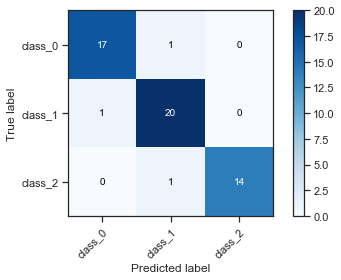

In [6]:
plot_confusion_matrix(y_test,y_pred,wine.target_names) 

 Los valores de la diagonal es la cantidad de casos correctamente identificados en el grupo de test para cada clase, mientras que el 1 en la primera fila y la segunda columna corresponde a una fila identifiacada como de la clase 'class_1' cuando su valor real es pertenecer a la clase 'class_0'.

 # PARTE 4: Cross-validation

 Con cross-validation, el conjunto de entrenamiento se divide en $k$ conjuntos disjuntos; se entrena sobre los datos correspondientes a $k-1$ de éstos, y se evalúa sobre el conjunto restante. Esto se repite $k$ veces, evaluando siempre sobre un conjunto distinto. Teniendo en cuenta el parámetro $k$, a éste método se le llama $k$-fold cross-validation.

 El código que está a continuación realizará 10-fold cross-validation usando Decision Tree sobre los datos. La forma de estimar el rendimiento del clasificador es, entre otras formas, calculando el promedio de todos los k-folds.

 Además se muestra la predición sobre los datos para testear.

In [7]:
## EJECUTAR ESTE BLOQUE

from sklearn.model_selection import cross_validate
import numpy as np

scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']
cv_results = cross_validate(clf, X, y, cv = 10, scoring = scoring, return_train_score= True)

print('Promedio Precision:', np.mean(cv_results['test_precision_macro']))
print('Promedio Recall:', np.mean(cv_results['test_recall_macro']))
print('Promedio F1-score:', np.mean(cv_results['test_f1_macro']))
print('Promedio Accucary:', np.mean(cv_results['test_accuracy']))

# Si quisieramos mostrar el resultado de cada k-fold, deberiamos quitar 
# la funcion np.mean para calcular el promedio. Esto mostraria una lista con el resultado de cada fold


Promedio Precision: 0.9054497354497355
Promedio Recall: 0.8936111111111111
Promedio F1-score: 0.8898509877921643
Promedio Accucary: 0.894702442380461


 ## Pregunta 4.1

 Comente el resultado obtenido y compare los valores de las métricas con respecto a lo obtenido en la pregunta 3.2 ¿Qué beneficios tiene emplear cross-validation?


 ### RESPUESTA PREGUNTA 4.1
 El resultado de la pregunt 3.1 es un mejor clasificador que el obtenido en la pregunta 4.1, ya que todos los indicadores de fitting derivados de la matriz de confusión entregan un valor más cercano a 1 que el testeo con la muestra aleatoria tradicional.
 La ventaja de utilizar cross validation es que permite entrenar el modelo prácticamente eliminando el sesgo inducido al entrenar el modelo.

 # PARTE 5: FINAL

 ## Pregunta 5.1

 Respecto a los 3 tipos de experimentos, ¿qué tipo de evaluación considera que es el mejor y por qué? (Refiérase a tamaño del dataset, distribución de clases, entre otras cosas.)


 ### RESPUESTA A PREGUNTA 5.1
 Consideramos que el mejor en nuestros test es el Arbol de decisiones, ya que tanto si se usa o no *cross-validation* obtiene resultados mucho mejores

 ## Pregunta 5.2

 Entrene un clasificador empleando k-nearest neighbors (**KNN**) considerando 5 vecinos y cross validation de 10 folds.

 Compare el resultado de cross validation obtenido usando Decision Tree y KNN. ¿Hay algún efecto notorio en cuanto al desempeño de ambos clasificadores? ¿Se podría decir que uno es mejor que otro? Explique.

 ### RESPUESTA A PREGUNTA 5.2

In [8]:
# Para cargar KNN
from sklearn.neighbors import KNeighborsClassifier
K = 5 # numero de vecinos
knn = KNeighborsClassifier(n_neighbors=K)  

## AGREGUE CODIGO PREGUNTA 5.2

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Para k-nearest neighbors")

print(classification_report(y_test, y_pred))

scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']
cv_results = cross_validate(knn, X, y, cv = 10, scoring = scoring, return_train_score= True)

print('Promedio Precision:', np.mean(cv_results['test_precision_macro']))
print('Promedio Recall:', np.mean(cv_results['test_recall_macro']))
print('Promedio F1-score:', np.mean(cv_results['test_f1_macro']))
print('Promedio Accucary:', np.mean(cv_results['test_accuracy']))

Para k-nearest neighbors
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54

Promedio Precision: 0.6714502164502163
Promedio Recall: 0.6602777777777777
Promedio F1-score: 0.6453775853775853
Promedio Accucary: 0.6757739938080495


C:\Users\basty\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\basty\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


 ### RESPUESTA A PREGUNTA 5.2 (EXPLICACION)
Existe una diferencia en desempeño muy notoria entre el árbol de decisiones y KNN correspondiente a aprox un 20% de desempeño en general. Por esto podríamos aventurar que el árbol de decisiones es mejor que knn.
